# Использование готовых архитектур в Pytorch
<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mWFPzsXw4RQ86iZGswmNY45WTSjZcF9u#scrollTo=9ic0H8b8qO5z) -->

## Импорт torch

В станадртной практике работы в datasience собственно-ручно написанные модели используются редко. Как правило пользуются уже предобученными моделями. Это свзяно с несколькими факторами, среди них перечислим следующие:
* Отсутствие достаотчно большого нарбора данных для качественного обучения моделей "с нуля".
* Отсутствие досточных вычислительных рессурсов для качественного обучения больших моделей "с нуля".
* Классы данных предворительно обученной модели во-многом совпадают с целевыми даными или включат их как подмножество (схожесть домена).
> Отметим, что Даже в отсутствии схожести домена предобученные нейронные сети явлются хорошей инициализацией для работы с моделью. Поэтому готовые, хорошо зарекомендовавшие себя модели лучше использовать "подготовленными" для набора данных. Более того, известно, что в сверточных моделях нижнии слои больше выделяют классо-незовисимые признаки, а с формированием признаков классов работают верхнии слои кодировщика.

В зависимости от выбора перечисленных причин использования готовых архитектур могут быть различные стратегии их обучения. Иллюстрация некотороых тратегий привидена ниже:  
<img src="https://www.researchgate.net/publication/342385796/figure/fig6/AS:917868644401165@1595848346602/Diagrams-of-transfer-learning-strategies-including-a-both-base-and-classifier-use.png" width="500px">

Среди стратегий ипользования готовых моделей можно выделить следующие:
* __Использование полностью готовой модели__, если известно, что целевой класс поподает в набор данных предобучения (__`Pretrained network`__).
* __Использование готового кодировщика признаков__, переобучение только головоной части (__`Transfer learning`__) - Эта наиболее частая стратегия предпологающая, что  задача попадет в домен предобучения, поэтмоу признаки будут релевантны. Но для конкретного набора данных необходимо обучить слои принятия решений (головную часть). При таком дообучении значения парамертов кодировщика признаков фиксируются (т.н. `freeze`).
* __Использование предобученной архитектуры как инициализации параметров__ для целевого обучения (__`fine tuning`__). При этом часть параметров кодировщика может быть фиксирована. Например, могут быть фиксированы нижнии слои или все кроме парамертов нормализации.

<blockquote>
    
Также можно бы было указать [более продвинутые стратегии](https://quiq.com/blog/what-is-transfer-learning/) использования предобученных моделей. Как правило это испльзование готового кодровщика признаков как основы для "расширенной" архитектуры или архитекутры для другой задачи 
* [__Многозадачное обучение__](https://libmtl.readthedocs.io/en/latest/docs/user_guide/mtl.html) (__Multitask Learning__) использование архитектуры, предобученной в одной задаче, как основы для решения второй, дополнительной задачи (__`multitask learning`__). То есть одна модель обучается решению нескольких задач.
* [__Доменная адаптация__](https://kevinmusgrave.github.io/pytorch-adapt/) (__domain adaptation__). Суть адаптации заключается в обучении модели на данных из домена-источника (`source domain`) так, чтобы она показывала сравнимое качество на целевом домене (`target domain`). [Например, `source domain` может представлять собой синтетические данные](https://habr.com/ru/companies/vk/articles/426803/), которые можно «дёшево» сгенерировать, а `target domain` — фотографии пользователей.  К такой адаптации можно также отнести и __Domain Confusion__, идея которого заключается в предобучении модели доменно-независимым признакам.
* [__Адаптация по нескольким примерам__](https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial16/Meta_Learning.html#Few-shot-classification) (__few-shot learning__, __zero-shot learning__,  __one-shot learning__). Общая идея подхода сегодня заключается в том, чтобы иметь модель предобученную на много-доменном наборе данных таким образом, чтобы на стадии донастройки модель могла справиться с целевой задачи без примеров или почти без примеров. 
* [__Мета-обучение__](https://pytorch.org/tutorials/beginner/knowledge_distillation_tutorial.html) (__meta learning__). Этот набор подходов не явлется переиспользованием модели под новый домен, однако, позволяет упростить модель, работоющую в текущем домене. При мета обучении как правило используется обученная модель - учитель и новая модель - ученик. Часто ученик меньше учителя или должен работать эффективней учителя при том же размере. 
    >[Иногда набор подходов типа мета обучение](https://www.v7labs.com/blog/transfer-learning-guide) также называют *Inductive Transfer Learning*, тогда как перенос результатов предобученной сети в новый домен можно бы было назвать *Transductive Transfer Learning*
</blockquote>



Ниже приведен [один из примеров](https://www.researchgate.net/publication/349066028_Gaze_Fusion-Deep_Neural_Network_Model_for_Glaucoma_Detection/figures?lo=1) выбора классических стретигий использования предобученной архитектуры [в зависимости от размера набора данных](https://neurohive-io.turbopages.org/neurohive.io/s/ru/tutorial/transfer-learning-keras/) и различий в доменах.

<img src="https://www.researchgate.net/publication/349066028/figure/fig1/AS:11431281215894339@1704424225470/Matrix-and-strategy-of-choosing-pretrained-model-based-on-size-similarity-of-dataset.png" width="500px">

Общая идея [заключается в том](https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras), что чем больше разница в доменах, тем больше должно быть данных и тем больше слоев сети (от окончания к началу), которые должны быть обучены. Однако, нужно отметить, что слишьком большое число удаленных слоев может привести к эффекту появления "переобучения" в предобученной архитектуре. Поэтому нужное число слоев должно быть определено эмпирически. 



Следует также указать некоторую дополнительную [специфику переиспользования моделей](https://cs231n.github.io/transfer-learning/). 
* В многих моделях желательно иметь размер батча и размер входного изображения аналогичными настройкам предобученной модели (особенно это правило важно для архитектур с `Batch Normalization`).
* В целом модель лучше использовать с теми же гиперпараметрами и параметрами аугментации, однако, эти все параметры не всегда известны. Например, если известно, что классификатро содержит дропаут с вероятностью $20\%$ следует начинать с того, чтобы не менять это значение.
* При __fine tuning__ предобученных слоев скорость обучения для них выбирают меньше, чем для вновь обучаемых слоев. Или скорость может варьироваться в зависимости от позиции слоя.
* При __fine tuning__ [следует стараться обучать вернхии слои кодировщика](https://www.v7labs.com/blog/transfer-learning-guide).  Первые несколько слоев как правило учат элементарные и общие признаки, которые применимы практически ко всем типам данных. По мере увеличения глубины слоя, признаки становятся все более специфичными для набора данных, на котором обучалась модель. Тонкая настройка направлена на то, чтобы адаптировать эти специализированные признаки для работы с новым набором данных, а не переписывать общие знания.
* Cледует отметить, что [не все модели одинаково способны к их переиспользованию](https://datagy.io/pytorch-transfer-learning/). Как правило, хорошие модели для переиспользования становятся индустриальным стандартом, например `ResNet` и `EfficientNet`. 
* В целом можно также отметить, что чем меньше набор данных и разрешение в нем, тем меньше нужно выбирать предобученную модель. Более того [на практике всегда имеет место компромисс](https://www.learnpytorch.io/06_pytorch_transfer_learning/) __performance vs. speed vs. size__ к которому также следует добавить время для эксперимента и возможности вычислителя (не всегда в большую модель можно положить батч нужного размера, если модель вообще можно положить в ОЗУ).
* Также пользуясь свободными моделями из сети интеренет в качестве основы следует понимать отвественность, часто деклалируемую используемой лицензией.

Важно также указать на то, __где найти предварительно обученные модели__.
Мир глубокого обучения строго предполоагет, что  люди по всему миру делятся своими наработками.
Часто код и предварительно обученные модели для последних современных исследований публикуются, например на `GitHub` в течение нескольких дней после публикации оригинальных статей (сами статьи также часто публикуются в режме "в печати" (`preprint`), например на [arxiv](https://arxiv.org/).

Поэтому есть набор стандартных мест, где вы можете найти предварительно обученные модели, чтобы использовать их для решения своих собственных задач.

| **Расположение** | **Что здесь? ** | **Ссылка(и)** | 
| ----- | ----- | ----- |
| **Библиотеки домена PyTorch** | Каждая из библиотек домена PyTorch (напр.,`torchvision`) поставляется с предварительно обученными моделями в той или иной форме. Модели в них работают прямо в PyTorch. | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [`torchhub`](https://pytorch.org/hub/), |
| **HuggingFace Hub** | Большой набор предварительно обученных моделей для различных доменов, в том числе компьютерное зрение и мультимодальных архитектур от организаций по всему миру. Также есть множество различных наборов данных. | https://huggingface.co/models, https://huggingface.co/datasets | 
| **`timm` (PyTorch Image Models) библиотека** | Почти все самые последние и лучшие модели компьютерного зрения в коде PyTorch, а также множество других полезных функций компьютерного зрения. | https://github.com/rwightman/pytorch-image-models|
| **Paperswithcode** | Коллекция последних статей по машинному обучению с приложенным кодом. Здесь также можно найти эталоны производительности моделей в различных задачах. | https://paperswithcode.com/ | 

*Доступ к таким высококачественным ресурсам, как приведенные выше, должен стать обычной практикой, когда в начале решения каждой задачи глубокого обучения вы задаете вопрос: "Существует ли предварительно обученная модель для моей задачи? "*.

Также по отдельным ахритектурам могут быть найдены полезные репозитории. Например [vit-pytorch](https://github.com/lucidrains/vit-pytorch), [mlp-mixer - Pytorch](https://github.com/lucidrains/mlp-mixer-pytorch) и другие. Кроме того недавно репозиторий моделей появился от разработчиков [`GitHub`](https://github.com/marketplace/models).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_stdlib_context

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

import os
import copy
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision
from torchvision import transforms, datasets
import torchvision.transforms as T

from torchinfo import summary

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from tqdm.notebook import tqdm, trange

import pandas as pd

Настроим работу с `PyTorch`. Выбирем формат работы и устройство для работы.

In [6]:
def torch_stats(): 
    torch_version = ".".join(torch.__version__.split(".")[:2])
    print('torch version:',torch_version)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Using device:', device)
    dtype = torch.float32
        
    if device.type == 'cuda':
        cuda_version  = torch.__version__.split("+")[-1]
        print("cuda: ", cuda_version)
        
        torch.set_default_tensor_type(torch.cuda.FloatTensor)
        print('Cuda is available:',torch.cuda.is_available())

        n_devices = torch.cuda.device_count()
        print('number of devices: %d'%(n_devices))

        for cnt_device in range(n_devices):
            print(torch.cuda.get_device_name(cnt_device))
            print('Memory Usage:')
            print('Allocated:', round(torch.cuda.memory_allocated(cnt_device)/1024**3,1), 'GB')
            print('Cached:   ', round(torch.cuda.memory_reserved(cnt_device)/1024**3,1), 'GB')
        # dtype = torch.cuda.FloatTensor
        
    torch.set_default_dtype(dtype) # float32
    print('default data type:',dtype)
    
    num_workers=os.cpu_count()
    print ('available number of workers (CPU cores):',num_workers)
    
    return device, dtype, num_workers
#-------------------------------
def torch_seed(seed = 42, deterministic = True):
    random.seed(seed) # random and transforms
    np.random.seed(seed) #numpy
    torch.manual_seed(seed) #cpu
    torch.cuda.manual_seed(seed) #gpu
    torch.backends.cudnn.deterministic=deterministic #cudnn    

#-------------------------------    
def clean_memory():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    to_remove = set()
    for k, v in globals().items():
        if isinstance(v, (torch.nn.Module)):
            to_remove.add(k)
    for k in to_remove:
        del globals()[k]
    gc.collect()

In [7]:
device, dtype, num_workers = torch_stats()
torch_seed(seed = 42, deterministic = True)

torch version: 2.2
Using device: cpu
default data type: torch.float32
available number of workers (CPU cores): 8


*Отметим* 
Если у вас нет GPU, то в данном уроке рекомендуем использовать Google Colab c включенным GPU.
Для смены среды выполнения (**runtime**) выбирите **Change runtime type** в соответствующем меню.
<br><u><b><Large>После экспериментов не забудьте вернуть среду на `None` так как время выделяемое для работы GPU ограничено.<b><u>


<!-- <img src="https://course.fast.ai/images/colab/04.png" width="350"> -->

Для знакомства с Google Colab можно воспользоваться 
[этим](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb) и 
[этим](https://colab.research.google.com/notebooks/basic_features_overview.ipynb), а также
[этим](hhttps://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82) руководствами.

# Перенос обучения при помощи моделей torchvision

## Загрузка модели.

В данном уроке мы рассмотрим вопрос использования т.н. предобученной архитектуры в целевой задаче. Напомним, что термин "предобученная" обозначает архитектуру с изначальными значениями весовых параметров, соотвествующиими модели,  обученной на не целевом наборе данных.

На практике очень редко кто-то пытается обучить всю сверточную сеть с нуля (со случайной инициализацией). В том числе, это связано с тем, что относительно редко имеется набор данных достаточного размера и достаточное время/вычислительные рессурсы для обучения. 

Вместо создания и обучения новой архитектуры обычно используют предварительно обученную сеть (предобученную на очень большом наборе данных, например, `ImageNet`, который содержит 1.2 миллиона изображений с 1000 категориями). Результаты предобученной сети используют либо как инициализацию, либо как фиксированный экстрактор признаков (кодировщик признаков).

Предворительно обученные сети могут быть найдены и загружены из любых репозиториев. Одим из наиболее простых способов работы с предобученными сетями является модуль `models` из библиотеки `torchvision`.


Информаци о доступных моделя в библиотеке `torchvision` может быть найдена в соответствующем разделе официального сайта, например, [тут](https://pytorch.org/vision/0.8/models.html).

В этом уроке мы будем использовать модель `resnet18`. Данная модель представляет собой наименьшую в линейке [`ResNet`](https://arxiv.org/abs/1512.03385) моделей, представленной в рамках базовых моделей в `PyTorch`. Информация о данной модели может быть найдена на [странице официального сайта `torchvision`](https://pytorch.org/vision/stable/generated/torchvision.models.resnet18.html), а также [тут](https://pytorch.org/hub/pytorch_vision_resnet/) и в официальной статье [тут](https://arxiv.org/pdf/1512.03385.pdf).
<img src="https://pytorch.org/assets/images/resnet.png"  wide ="200px"> 
* https://arxiv.org/pdf/1512.03385.pdf

Мы загрузим предобученную версию модели `pretrained=True`. Важно указать, что в последних версихя `PyTorch` аргумент `pretrained` заменен на более подробное указание истоника весовых парамертов. Поэтому мы укажем на параметры `weights='ResNet18_Weights.IMAGENET1K_V1'`, что будет подразумевать набор парамертов, обученных для набора данных `ImageNet`.

> Также [можно бы было указать](https://pytorch.org/vision/stable/models.html) `weights='DEFAULT'`, `weights='IMAGENET1K_V1'` или `weights='ResNet18_Weights.DEFAULT'`, однако, указанный способ более точно указывает на специфику предобученной модели.

<blockquote>
    
*Отметим*, что также модель можно загрузить в виде модуля для последующего использования в рамках построения новых архитектур. Для этого следует создать экземпляр класса ```torchvision.models.ResNet()``` с описанием его структуры в виде блоков. <br>

Также, в `PyTorch` модели могут быть загруженны с т.н. [`torch.hub`](https://pytorch.org/docs/stable/hub.html), например в следующем виде.
    
```python
    
    model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', 'IMAGENET1K_V1')
    
```
Смотрите больше информации о моделях, доступных в доступных  `torch.hub` [тут](https://pytorch.org/hub/research-models/compact).
    
Также отметим, что отличие моделей из `torch.hub` и `torchvision` заключается лишь в истонике (репозитории). 
Оригинальные модели из `torchvision` можно получить в `torch.hub` в виде 
    ```model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)```.
    
Cтоит также отметить [наличие тонкостей](https://pytorch.org/tutorials/intermediate/quantized_transfer_learning_tutorial.html) в работе с некоторыми моделями, имеющими оптимизацию под `inference`.

In [29]:
# model = torchvision.models.resnet18(pretrained=True)
model = torchvision.models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')

Проверим структуру модели

In [30]:
summary(model,input_size=(1,3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 16, 16]           9,408
├─BatchNorm2d: 1-2                       [1, 64, 16, 16]           128
├─ReLU: 1-3                              [1, 64, 16, 16]           --
├─MaxPool2d: 1-4                         [1, 64, 8, 8]             --
├─Sequential: 1-5                        [1, 64, 8, 8]             --
│    └─BasicBlock: 2-1                   [1, 64, 8, 8]             --
│    │    └─Conv2d: 3-1                  [1, 64, 8, 8]             36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 8, 8]             128
│    │    └─ReLU: 3-3                    [1, 64, 8, 8]             --
│    │    └─Conv2d: 3-4                  [1, 64, 8, 8]             36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 8, 8]             128
│    │    └─ReLU: 3-6                    [1, 64, 8, 8]             --
│

После загрузки модели нужно заморозить все параметры для экстрактора признаков. Для этого нам нужно установить `requires_grad = False`, чтобы заморозить параметры, чтобы градиенты не вычислялись в `backward()`. То есть такой мерой мы предотвращаем возможное переобчение модели.

In [85]:
#freeze all parameters
for param in model.parameters():
    param.requires_grad = False

Для последующих операций нам также понадобится знать названия всех слоев в сети.

In [32]:
for name,_ in model.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


In [33]:
*_, last = model.named_children()
last

('fc', Linear(in_features=512, out_features=1000, bias=True))

In [14]:
# for name, module_ in model.named_modules():
#     print(name)

Напомним, что при неоходимости более получения более развернутой инофрмации о слоях можно также воспользоваться вызовом вида
```python
for name, module_ in model.named_modules():
    print(name, '\t structure =',list(module_.size()))
```

## Загрузка набора данных

Теперь давайте проведем загрузку набора данных. Для этого урока мы попробуем загрузить данные из интернета. Для этого создадим следующие процедуры, позволяющие загрузить архив и распаковать его в нужную директорию в рамках проекта. 

Отметим, что данный пример вдохновлен [этим](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html) уроком.

In [15]:
import os
from torchvision.datasets.utils import download_and_extract_archive

In [16]:
url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
root_directory = os.path.join(os.getcwd(),'data')

archive_name = url.split('/')[-1]
dataset_directory = os.path.join(root_directory, archive_name)
dataset_directory = os.path.splitext(dataset_directory)[0]

download_and_extract_archive(url, root_directory)

Using downloaded and verified file: /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data/hymenoptera_data.zip
Extracting /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data/hymenoptera_data.zip to /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data


Содержания созданной дирекктории с файлами можно посмотреть, например, следующим образом

In [17]:
content = os.listdir(dataset_directory)
print(content)
for dir_ in content:
    path_ = os.path.join(dataset_directory,dir_)
    if os.path.isdir(path_):
        print(dir_, ':\t', os.listdir(path_ ) )

['train', 'val']
train :	 ['bees', 'ants']
val :	 ['bees', 'ants']


Как видно, в нашем случае набор данных представляет собой абор изображений двух классов. 
Набор разделен на тренировочную и валидационную подвыборки.
Для загрузки данных с диска будем использовать загрузчик `ImageFolder`.

In [18]:
train_transform =  transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], 
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], 
                             [0.229, 0.224, 0.225])
    ])

traindata = datasets.ImageFolder(os.path.join(dataset_directory, 'train'),train_transform)

valdata   = datasets.ImageFolder(os.path.join(dataset_directory, 'val'),test_transform)

names_classes = traindata.classes
print(names_classes)

print(f'Number of training examples: {len(traindata)}')
print(f'Number of validation examples: {len(valdata)}')

['ants', 'bees']
Number of training examples: 244
Number of validation examples: 153


Также создадим загрузчик данных.

Отметим, следующее. Так как в данном примере предполагается, что мы будем использовать `GPU` (но не обязательно), то мы создадим две версии аргументов загрузчика. В случае  `GPU` мы будем вызов `DataLoader` c аргументом `torch.Generator(device='cuda')`, в ином случае (`CPU`) мы укажем на число процессов для параллелизации (`min(BATCH_SIZE, num_workers)`). 

In [23]:
BATCH_SIZE  = 16
g = torch.Generator(device=device)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=BATCH_SIZE, shuffle=True, generator = g)
valloader   = torch.utils.data.DataLoader(valdata, batch_size=BATCH_SIZE, shuffle=False, )

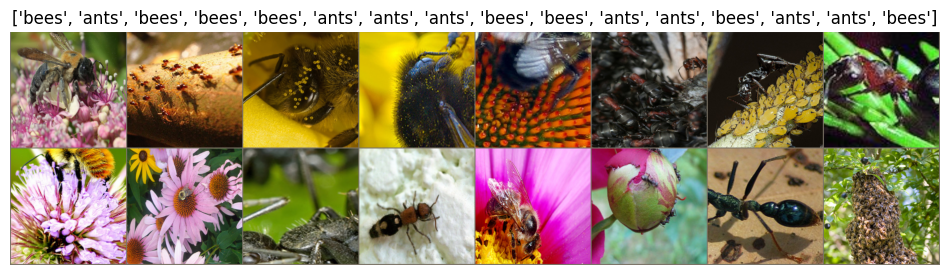

In [26]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(12,4))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(trainloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[names_classes[x] for x in classes])

## Transfer Learning

После того, как сформирована фиксированная модель можно приступить к разморозке и/или замене части слоев.
Как правило, операриуют только с  головными слоями.

Замним головной слой (`fc`) на свой, представляющий линейный слой с выходом, равным числу классов. 

Для инициализации нового слоя мы должны будем знать размер его входа. Его можно получить как атрибут `in_features` для соответствующего слоя. Также можно проинициализировать параметры слоя. Для весовых параметров используем инициализацию Ксавьера, а для смещения инициализацию нулями.

In [34]:
n_classes = len(names_classes)

# Parameters of newly constructed modules have requires_grad=True by default
n_fc_in = model.fc.in_features

model.fc = nn.Linear(n_fc_in, n_classes)

nn.init.xavier_uniform_(model.fc.weight)
model.fc.bias.data.fill_(0);

Посмотрим теперь на число тренируем и на общее число параметров.

In [35]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of trainable parameters for the model: %d' % (num_params))

num_params = sum(p.numel() for p in model.parameters() )
print('Number of all parameters for the model: %d' % (num_params))

Number of trainable parameters for the model: 1026
Number of all parameters for the model: 11177538


In [36]:
summary(model,(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 2]                    --
├─Conv2d: 1-1                            [1, 64, 112, 112]         (9,408)
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         (128)
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           (36,864)
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           (128)
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           (36,864)
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           (128)
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]   

Также выделим тренируемые параметры в отдельный объект.

In [37]:
trainable_parameters = filter(lambda p: p.requires_grad, model.parameters())

Запишем параметры обучения.

Отметим, что в данном случае, мы могли бы вместо `trainable_parameters` записать `model.fc.parameters`. Однако, указанный подход более общий.

In [74]:
LR = 0.001

model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)


trainable_parameters = filter(lambda p: p.requires_grad, model.parameters())
optimizer = optim.SGD(trainable_parameters, lr=LR, momentum=0.9)


Также запишим функционал, необходимый для обучения. Данные функции были уже расмортены на предыдущих уроках.

In [75]:
def accuracy(y_pred, y):
    cls_pred = y_pred.argmax(1, keepdim=True)    
    correct_cls = cls_pred.eq(y.view_as(cls_pred)).sum()
    acc = correct_cls.float() / y.shape[0]
    return acc
    
#-----------------------------
def train(model, dataloader, optimizer, criterion, metric, device):

    epoch_loss = 0
    epoch_acc  = 0

    model.train()

    for (x, y) in tqdm(dataloader, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred = model.forward(x)

        loss = criterion(y_pred, y)
        acc  = metric( y_pred, y)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc  += acc.item()

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)
#--------------------------
def evaluate(model, dataloader, criterion, metric, device):

    epoch_loss = 0
    epoch_acc  = 0

    model.eval()

    with torch.no_grad():
        
        for (x, y) in tqdm(dataloader, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred = model.forward(x)

            loss = criterion(y_pred, y)
            acc  = metric( y_pred, y)

            epoch_loss += loss.item()
            epoch_acc  += acc.item()

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)
#-------------------
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


Проверим, какая точность достигается на тестовых данных в настоящее время 

In [76]:
best_epoch = 0
test_loss, test_acc = evaluate(model, valloader, criterion,accuracy, device)
print(f'best epoch {best_epoch}: Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

best epoch 0: Test Loss: 1.538 | Test Acc: 44.24%


Теперь проведем обучение согласно стандартной процедуре, рассмотренной нами в предыдущих уроках

In [77]:
EPOCHS = 20

train_loss = torch.zeros(EPOCHS)
valid_loss = torch.zeros(EPOCHS)
train_acc  = torch.zeros(EPOCHS)
valid_acc  = torch.zeros(EPOCHS)

best_valid_loss = float('inf')
best_epoch = 0

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss[epoch], train_acc[epoch] = train(model, 
                                                trainloader, 
                                                optimizer, 
                                                criterion,
                                                accuracy,
                                                device)
    
    valid_loss[epoch], valid_acc[epoch] = evaluate(model, 
                                                   valloader, 
                                                   criterion, 
                                                   accuracy,
                                                   device)

    if valid_loss[epoch] < best_valid_loss:
        best_valid_loss = valid_loss[epoch]
        best_epoch = epoch
        torch.save(model.state_dict(), 'best_model.pt')

    epoch_mins, epoch_secs = epoch_time(start_time, time.monotonic())
    if epoch%2 == 1:    # print every 2 epochs:
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'Train Loss: {train_loss[epoch]:.3f} | Train Acc: {train_acc[epoch]*100:.2f}%',
               f'| Val. Loss: {valid_loss[epoch]:.3f} | Val. Acc: {valid_acc[epoch]*100:.2f}%')

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 17s
Train Loss: 0.594 | Train Acc: 81.25% | Val. Loss: 0.263 | Val. Acc: 90.14%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 18s
Train Loss: 0.164 | Train Acc: 91.80% | Val. Loss: 0.425 | Val. Acc: 87.01%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 20s
Train Loss: 0.266 | Train Acc: 90.23% | Val. Loss: 0.445 | Val. Acc: 87.64%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 21s
Train Loss: 0.129 | Train Acc: 96.09% | Val. Loss: 0.328 | Val. Acc: 93.26%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 22s
Train Loss: 0.073 | Train Acc: 96.88% | Val. Loss: 0.360 | Val. Acc: 93.26%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 23s
Train Loss: 0.042 | Train Acc: 98.83% | Val. Loss: 0.450 | Val. Acc: 91.39%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [78]:
model.load_state_dict(torch.load('best_model.pt'))
test_loss, test_acc = evaluate(model, valloader, criterion, accuracy, device)
print(10*'--',f'\nbest epoch {best_epoch}: Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

-------------------- 
best epoch 1: Test Loss: 0.263 | Test Acc: 90.14%


Проведенная процедура оказалась достаточно быстрой и дала хорошие результаты.

## `Fine-Tuning` блока кодировщика.

В учебных целях давайте попробуем разморозить блок кодировщика признаков `layer4` и сравним результаты.

Чтобы узнать состав слоя давайте посмотрим на имена его подмодулей. 
Отметим, что при необходимости, мы также сможем узнать имена параметров слоя используюя `model.layer4.named_parameters()`

In [44]:
for p in model.layer4.named_modules():
    print(p[0])


0
0.conv1
0.bn1
0.relu
0.conv2
0.bn2
0.downsample
0.downsample.0
0.downsample.1
1
1.conv1
1.bn1
1.relu
1.conv2
1.bn2


Отметим, что каждый слой блока может быть извлечен при помощи метода `get_submodule()`. При необходимости аналогичным образом могут быть извлечены конкретные параметры, для этого вместо `submodule` нужно использовать метод `get_parameters()`.

Перед проведением размораживания слоев давайте перепишем нашу функцию инициализации так, чтобы она могла работать как со сверточными, так и с линейным слоями. 
*Обратите внимание*, что в функции инициализации мы работаем только со слоями `Conv2d` и `Linear`. Если эти обстаятельства не будут указаны, то инциализации будут подвержены и другие элементы архитектуры, например, слой `BatchNorm`.

In [45]:
def init_weights(m):
    
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight)
    
    elif isinstance(m, nn.Linear): 
        nn.init.xavier_uniform_(m.weight)
    
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        if m.bias != None:
            m.bias.data.fill_(0)

Теперь проведем процедуру разморозки и переинциализации весовых парметров для двух блоков: `model.layer4`, который мы вызвали под псевдонимом `layer_` и `model.fc`. Отметим, также, что если вы переинциализировали изначальную модель, то вам также потребуется заново заменить последний слой на свой. 

In [47]:
for  m in [model.layer4, model.fc]:
    for param in m.named_parameters():
        print(param[0])
        param[1].requires_grad = True
    m.apply(init_weights);  

0.conv1.weight
0.bn1.weight
0.bn1.bias
0.conv2.weight
0.bn2.weight
0.bn2.bias
0.downsample.0.weight
0.downsample.1.weight
0.downsample.1.bias
1.conv1.weight
1.bn1.weight
1.bn1.bias
1.conv2.weight
1.bn2.weight
1.bn2.bias
weight
bias


Проверим, сколько теперь параметров подлежат тренировке.

In [49]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of trainable parameters for the model: %d' % (num_params))

Number of trainable parameters for the model: 8394754


Также отметим, что в случае, если бы мы хотели переинциализировать только часть слоев блока `layer4`, то следовало бы исползовать следующий код:
```python
layer_ = model.layer4.get_submodule('1.conv2')
for  m in [layer_, model.fc]:
    for param in m.parameters():
        param.requires_grad = True
    m.apply(init_weights);   
```

Теперь мы можем снова проверить точность сети "по умолчанию" для наших данных.

In [50]:
best_epoch = 0
test_loss, test_acc = evaluate(model, valloader, criterion, accuracy, device)
print(f'best epoch {best_epoch}: Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

best epoch 0: Test Loss: 4.745 | Test Acc: 44.38%


Проведем переинициализацию параметров обучения.

In [90]:
LR = 0.001

model = model.to(device)

criterion = nn.CrossEntropyLoss()

criterion = criterion.to(device)


In [91]:
trainable_parameters = []
for p in model.parameters():
    if p.requires_grad:
        trainable_parameters +=[p]

optimizer = optim.SGD(trainable_parameters, lr=LR, momentum=0.9)    

Теперь провеним результаты обучения.

In [92]:
EPOCHS = 20

train_loss = torch.zeros(EPOCHS)
valid_loss = torch.zeros(EPOCHS)
train_acc  = torch.zeros(EPOCHS)
valid_acc  = torch.zeros(EPOCHS)

best_valid_loss = float('inf')
best_epoch = 0

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss[epoch], train_acc[epoch] = train(model, 
                                                trainloader, 
                                                optimizer, 
                                                criterion, 
                                                accuracy,
                                                device)
    
    valid_loss[epoch], valid_acc[epoch] = evaluate(model, 
                                                   valloader, 
                                                   criterion,
                                                   accuracy,
                                                   device)

    if valid_loss[epoch] < best_valid_loss:
        best_valid_loss = valid_loss[epoch]
        best_epoch = epoch
        torch.save(model.state_dict(), 'best_model.pt')

    epoch_mins, epoch_secs = epoch_time(start_time, time.monotonic())
    if epoch%2 == 1:    # print every 2 epochs:
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss[epoch]:.3f} | Train Acc: {train_acc[epoch]*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss[epoch]:.3f} |  Val. Acc: {valid_acc[epoch]*100:.2f}%')

model.load_state_dict(torch.load('best_model.pt'))
test_loss, test_acc = evaluate(model, valloader, criterion, accuracy, device)
print(10*'--',f'\nbest epoch {best_epoch}: Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 10s
	Train Loss: 0.269 | Train Acc: 91.41%
	 Val. Loss: 0.717 |  Val. Acc: 84.93%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 11s
	Train Loss: 0.297 | Train Acc: 90.62%
	 Val. Loss: 0.355 |  Val. Acc: 92.01%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 10s
	Train Loss: 0.334 | Train Acc: 89.45%
	 Val. Loss: 0.405 |  Val. Acc: 88.26%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 11s
	Train Loss: 0.112 | Train Acc: 96.09%
	 Val. Loss: 0.389 |  Val. Acc: 89.51%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 11s
	Train Loss: 0.293 | Train Acc: 85.55%
	 Val. Loss: 0.394 |  Val. Acc: 90.76%


Training:   0%|          | 0/16 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [93]:
model.load_state_dict(torch.load('best_model.pt'))
test_loss, test_acc = evaluate(model, valloader, criterion, accuracy, device)
print(10*'--',f'\nbest epoch {best_epoch}: Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

-------------------- 
best epoch 3: Test Loss: 0.355 | Test Acc: 92.01%


Полученные результаты ниже предыдущих. Это связано с рядмо факторов. Во-первых, чем больше параметров подлежат тренировке, тем больший требуется объем входных данных. Во-вторых, вероятно, число эпох обучения достаточно мало. Однако, в целом, полученные результаты лучше, чем  изначально, что позволяет сделать вывод об обучаемости данной модели.

## Задания

__1.__ Сравните точность модели ResNet для задачи `fine-tuning` всего `feature extractor`.

__2.__ В настоящее время `PyTorch` предоставляет расширенный функционал работы с предобученными моделями. Этот функционал может быть получен путем импорта весовых параметров, которые на самом деле содержат и часть гиперпараметров модели. Пример получения преобразований набора данных для модели `resnet18` показан ниже.

In [55]:
weights = torchvision.models.ResNet18_Weights.DEFAULT
weights.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

__Предлагается__ оценить качество рабоыт модели при исользовании загруженных преобразований вместо стандартных.

__3.__ Каждая модель имеет свою именнованную структуру. Модель `ResNet` имеет структуру `[conv1, bn1, relu, maxpool, layer1
layer2, layer3, layer4, avgpool, fc]`. Посмотрим на структуру моделей `EfficientNet`

In [56]:
model = torchvision.models.efficientnet_b0(weights='IMAGENET1K_V1')
for name,_ in model.named_children():
    print(name)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /Users/mvronkin/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████████████████████████████████| 20.5M/20.5M [00:05<00:00, 3.77MB/s]

features
avgpool
classifier


In [59]:
*_, l = model.named_children()
l

('classifier',
 Sequential(
   (0): Dropout(p=0.2, inplace=True)
   (1): Linear(in_features=1280, out_features=1000, bias=True)
 ))

In [61]:
l[1][1]

Linear(in_features=1280, out_features=1000, bias=True)

Чаще всего интересовать нас будет только классификатор. Узнаем его структуру

In [63]:
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)

__Предлагается__ Произвести `transfer learning` для модели `EfficientNet B0` для изучаемого набора данных.

__4.__ Часто на практике задача состоит в необходимости выбора моделей для низкопроизводительных устройств. Например  такие модели можно найти среди `mobilenet`, `efficientnet_b0`, `convnext` и других, как правило модели идут с суфиксами `tiny` и `small`, а также это могут быть специальные модели типа `squeezenet`. Полный список моделей `torchvision` можно получить так, как это показано ниже

In [66]:
from torchvision.models import list_models

all_models = list_models()
classification_models = list_models(module=torchvision.models)
# classification_models

In [67]:
model = torchvision.models.vit_b_16(weights='IMAGENET1K_V1')
for name,_ in model.named_children():
    print(name)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /Users/mvronkin/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|████████████████████████████████████████| 330M/330M [00:28<00:00, 12.4MB/s]


conv_proj
encoder
heads


In [68]:
*_, l = model.named_children()
l

('heads',
 Sequential(
   (head): Linear(in_features=768, out_features=1000, bias=True)
 ))

<blockquote>

Отметим, что [в последних версиях](https://pytorch.org/blog/easily-list-and-initialize-models-with-new-apis-in-torchvision/) `torchvision` доступный функционал `get_model, get_model_weights, get_weight, list_models`
```python
    get_model("quantized_mobilenet_v3_large", weights="DEFAULT")
    QuantizableMobileNetV3(
      (features): Sequential(
       ....
       )
```

__Предлагается__ изучить список моделей, найти примеры легковесных моделей и сравнить их параметры.

<details>
    
```python

    import torchvision
    from torchvision.models import get_model, get_model_weights, list_models


    max_params = 5000000

    tiny_models = []
    for model_name in list_models(module=torchvision.models):
        weights_enum = get_model_weights(model_name)
        if len([w for w in weights_enum if w.meta["num_params"] <= max_params]) > 0:
            tiny_models.append(model_name)

    print(tiny_models)
    # ['mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mobilenet_v2', ...]

    model = get_model(tiny_models[0], weights="DEFAULT")
    print(sum(x.numel() for x in model.state_dict().values()))

```

__5.__ Часто моделей из torchvision не достаточно для полноценного исследования. Как говорилось выше есть несколько источников для поиска только официальных моделей. Пожалуй одним из наиболее популярных сегодня решений для  задач классификации (и  получения готовых [`feature extractor`](https://huggingface.co/docs/timm/feature_extraction)) является бибилотека [`timm`](https://huggingface.co/timm). Предобученные [модели бибилотеки `timm`](https://huggingface.co/models?pipeline_tag=image-classification&library=timm,pytorch&sort=trending) [обладают широким функционалом]( https://huggingface.co/docs/timm/quickstart), в том числе для задач `transfer learning`. Бибилотека содержит более $1000 $ моделей и набор стандартных датасетов для их предобучения. Также в бибилотеке представлены дополнительные утилиты для работы с моделями (например утилиты аугментации моделей). Ниже показан пример запуска `timm` для архитектуры `resnet` c замененным головными слоем,  рассчитанным для 2 классов. Также в модели указано, что входные данные будут иметь 3 канала (иногда это важно).

> Отметим, что `timm` является частью экосистемы [`hugging face`](https://huggingface.co/timm), однако используется и за его пределами. Например `timm` имеет хорошую документацию для работы с фремворком [`fast ai`](https://timm.fast.ai/).

> Также стоит отметить возможность работы с [`huggingface_hub`](https://huggingface.co/docs/timm/v1.0.7/en/hf_hub). При помощи `timm` функционал позволяет как загружать модели из `huggingface_hub`, так загружить модели в `huggingface_hub`.

In [69]:
import timm

In [70]:
model = timm.create_model('resnet50', pretrained=True, num_classes=2, in_chans=3)
out = model(torch.randn(7, 3, 224, 224))
print(f'Unpooled shape: {out.shape}')

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Unpooled shape: torch.Size([7, 2])


Полученные в `timm` модели можно использовать в `PyTorch` аналогично моделям `torchvision`.

In [71]:
for name,_ in model.named_children():
    print(name, end=', ')

conv1, bn1, act1, maxpool, layer1, layer2, layer3, layer4, global_pool, fc, 

Проще всего в `timm` загрузить готовую модель без изменений и произвести с ней тотже порядок действий, как это было показано в примерах.

In [72]:
model = timm.create_model('vit_tiny_patch16_224', pretrained=True)
model.head

model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

Linear(in_features=192, out_features=1000, bias=True)

In [81]:
for m in model.children():
    m.requires_grad_=False

In [88]:
model.head = nn.Linear(model.head.in_features, 2)

Обратите внимание, что модели в `timm` загружаются в режиме `fine tuning` (все параметры готовы к обучению).

In [89]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in model.parameters())
print('trainable p:', trainable_params, 'all p:', total_params)

trainable p: 386 all p: 5524802


Поэтому важно замораживать параметры, которые не планируются к тренировке.

Модели в Timm можно найти при помощи [поисковика hugging face](https://huggingface.co/models?pipeline_tag=image-classification&library=timm,pytorch&sort=trending) или функции  `list_models` как это показано ниже.

In [96]:
import timm
from pprint import pprint
model_names = timm.list_models('*femto*')
pprint(model_names)

['convnext_femto', 'convnext_femto_ols', 'convnextv2_femto']


Часто бибилотеку `timm` используют для получения моделей трансформеров и других послдених моделей в области компьютерного зрения. __Предлагается__ Провести анализ моделей трансфромеров в `timm` и провести `transfer learning` для одной из них.

In [98]:
model = timm.create_model('convnext_femto', pretrained=True)
summary(model)

Layer (type:depth-idx)                        Param #
ConvNeXt                                      --
├─Sequential: 1-1                             --
│    └─Conv2d: 2-1                            2,352
│    └─LayerNorm2d: 2-2                       96
├─Sequential: 1-2                             --
│    └─ConvNeXtStage: 2-3                     --
│    │    └─Identity: 3-1                     --
│    │    └─Sequential: 3-2                   42,432
│    └─ConvNeXtStage: 2-4                     --
│    │    └─Sequential: 3-3                   18,624
│    │    └─Sequential: 3-4                   158,592
│    └─ConvNeXtStage: 2-5                     --
│    │    └─Sequential: 3-5                   74,112
│    │    └─Sequential: 3-6                   1,836,288
│    └─ConvNeXtStage: 2-6                     --
│    │    └─Sequential: 3-7                   295,680
│    │    └─Sequential: 3-8                   2,403,840
├─Identity: 1-3                               --
├─NormMlpClassifierHead: 

__6.__ В некоторых случаях, по крайней мере, в учебных целях, вам может понадобится расширить модель, например дополнив ее новой головной частью или расширив кодировщик признаков.  Давайте попробуем сделать такое упражнение. 

Перед началом мы покажем, как получить модель с удалением части ее слоев. Поскольку известна как модель выглядит, мы удалим из нее слой глобального пулинга и последний слой.

In [99]:
model = torchvision.models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')
new_model_ = nn.Sequential(*list(model.children())[:-2])
summary(new_model_,input_size=(1,3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 512, 7, 7]            --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

Отметим, что в данном случае мы оставили от модели только т.н. кодировщик признаков. Такая операция может быть весьма удобной в ряде случаев.

Также нам будет полезно получить число признаков, которые мы будем теперь иметь. Эту операцию можно сделать по разному. Например, конкретно для нашей модели, с учетом ее структуры, можно было бы сделать следующим образом.
```python
n_features = list(list(list(new_model_.children())[-1])[-1].children())[-1].num_features
```
В более общем случае мы можем создать тензор ожидаемого входного размера и посмотреть каким он стал на выходе. Например давайте создаим некоторый случайный вектор, имеющий размерность соответствующую размеру батча нашей модели. 
Отметим, что при желании можно просто получить батч тренировочной выборки и проверить точность для него. Для этого моет быть использова следующий код.
```python
x,y = next(iter(trainloader))
x = x.to(device)
```

In [ ]:
x = torch.randn((4,3,224,224), device=device)

out = new_model_(x)
print(out.shape)

n_features = out.shape[1]

torch.Size([4, 512, 7, 7])


Теперь мы попробуем создать новую модель. Модель будет иметь в качестве входных аргуметнов исходную модель `resnet18`, число выделенных кодировщиком (или его частью) признаков  `n_features` и число выходных классов `n_classes`.
В нашей новой модели мы добавим один сверточный слой, который будет снижать число признаков до необходимого `conv_last`. После этого слоя мы создаим новый слой глобального среднего пулинга и новый головной слой.  
Также модель будет включать операции заморозки слоев энкодера и инициализации новых слоев. 

Отметим, что в зависимости от модели число слоев, которые необходимо будет обрезать может варьироваться. В нашем случае мы убираем два верхних слоя - `GAP` и слой классификации (`fc`), поэтому соответствующий параметр `cutlayer=2`.

In [112]:
class NewResNet(nn.Module):
    def __init__(self, model, n_features=512, n_classes=2, cutlayer =2):
        super().__init__()
        
        self.new_model_ = nn.Sequential(*list(model.children())[:-cutlayer])
        
        for param in self.new_model_.parameters():
            param.requires_grad = False
            
        self.conv_last  = nn.Conv2d(in_channels  = n_features, 
                                    out_channels = 256, 
                                    kernel_size  = 3,
                                    stride       = 1,
                                    padding      = 1,
                                    dilation     = 1)
        
        # self.conv_last.apply(self.init_weights)
        
        self.gap = nn.AdaptiveAvgPool2d((1,1))
        
        self.fc  = nn.Linear(in_features = 256, 
                                out_features = n_classes) 
        
        for m in [self.conv_last, self.fc]:
            m.apply(self.init_weights)
    
    #---------------------------------------------
    def init_weights(self, m):
    
        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight)

        elif isinstance(m, nn.Linear): 
            nn.init.xavier_uniform_(m.weight)

        if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
            if m.bias != None:
                m.bias.data.fill_(0)
    
    #---------------------------------------------        
    def forward(self,x):
        x = self.new_model_(x)
        print(x.shape)
        x = torch.relu(self.conv_last(x))
        x = self.gap(x)
        x = torch.flatten(x, 1)
        
        x = self.fc(x)        
        return x

Посмотрим, как выглядит наше модель.

In [115]:
model = torchvision.models.resnet18(weights=torchvision.models.resnet.ResNet18_Weights.IMAGENET1K_V1)

new_model = NewResNet(model)

summary(new_model,input_size=(1,3, 224, 224))

torch.Size([1, 512, 7, 7])


Layer (type:depth-idx)                        Output Shape              Param #
NewResNet                                     [1, 2]                    --
├─Sequential: 1-1                             [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                            [1, 64, 112, 112]         (9,408)
│    └─BatchNorm2d: 2-2                       [1, 64, 112, 112]         (128)
│    └─ReLU: 2-3                              [1, 64, 112, 112]         --
│    └─MaxPool2d: 2-4                         [1, 64, 56, 56]           --
│    └─Sequential: 2-5                        [1, 64, 56, 56]           --
│    │    └─BasicBlock: 3-1                   [1, 64, 56, 56]           (73,984)
│    │    └─BasicBlock: 3-2                   [1, 64, 56, 56]           (73,984)
│    └─Sequential: 2-6                        [1, 128, 28, 28]          --
│    │    └─BasicBlock: 3-3                   [1, 128, 28, 28]          (230,144)
│    │    └─BasicBlock: 3-4                   [1, 128, 28, 28]      

__Предлагается__ провести обучение созданной модели `NewResNet`.